# Heat equation

We will consider the steady 2D heat problem:
\begin{equation}
\nabla^2 u=f(x,y), \qquad \nabla^2 = \frac{\partial^2}{\partial x^2}+\frac{\partial^2}{\partial y^2}.
\end{equation}

Applying the second derivative central difference formula at the interior points gives

\begin{equation*}
u_{xx}(x_i,y_j) = \frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{h^2},
\end{equation*}

\begin{equation*}
u_{yy}(x_i,y_j) = \frac{u_{i,j+1}-2u_{i,j}+u_{i,j-1}}{h^2},
\end{equation*}

and so we obtain
```{math}
:label: fivept
u_{i+1,j}+u_{i-1,j}+u_{i,j+1}+u_{i,j-1}-4u_{i,j}=h^2 f(x_i,y_j)
```

````{panels}
:card: border-0
The expression on the left in {eq}`fivept` is known as the five-point formula. It can be represented graphically using a stencil, as shown on the right.
---
```{image} images/stencil.png
:alt: secant
:align: center
:scale: 30%
```
````

## Method 1 : Using simultaneous equations

Consider a rectangular plate, with temperature $u(x,y)$ described by the steady heat equation $\nabla^2 u = 0$. The plate is maintained at boundary temperatures $u = 300, 400$ on pairs of opposite edges as shown. We will solve this problem using a central finite difference scheme on a (3 × 3) grid of interior points.

<br>

```{image} images/3_3_grid.png
:alt: 3x3 grid
:scale: 70%
:align: center
```
<br>


There is one equation for each node (equation variable), so we  resulting in the following system of equations :

$$
\begin{bmatrix}
-4 & 1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
1 & -4 & 1 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 1 & -4 & 0 & 0 & 1 & 0 & 0 & 0 \\
1 & 0 & 0 & -4 & 1 & 0 & 1 & 0 & 0 \\
0 & 1 & 0 & 1 & -4 & 1 & 0 & 1 & 0 \\
0 & 0 & 1 & 0 & 1 & -4 & 0 & 0 & 1 \\
0 & 0 & 0 & 1 & 0 & 0 & -4 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 1 & -4 & 1 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 1 & -4
\end{bmatrix}
\begin{bmatrix}
\phi_{11}\\\phi_{12}\\\phi_{13}\\\phi_{21}\\\phi_{22}\\\phi_{23}\\\phi_{31}\\\phi_{32}\\\phi_{33}
\end{bmatrix}
=
\begin{bmatrix}
-700\\-400\\-700\\-300\\0\\-300\\-700\\-400\\-700
\end{bmatrix}
$$

Notice that as a consequence of reshaping the array of node values into a column it has become slightly harder to keep track of the nodes that are neighbours. Additionally, inverting the sparse coefficient matrices can be computationally impractical for problems with many nodes. We therefore .


### Method 2 : Using an iterative approach

The discretised heat equation rearranges to the following iterative formula:
\begin{equation}\label{discr}
u_{i,j} = \frac{1}{4}\left(u_{i+1,j}+u_{i-1,j}+u_{i,j+1}+u_{i,j-1}-h^2 f(x_i,y_j)\right)
\end{equation}

We will solve  for the case where:
\begin{equation}
f(x,y) = 2\cos(\pi y)-\pi^2(1+x)^2\cos(\pi y),
\end{equation}
subject to the conditions
\begin{align*}
u(x,0)&=(1+x)^2, \quad &u(x,1)&=-(1+x)^2,\\
u(0,y)&=\cos(\pi y), \quad &u(1,y)&=4\cos(\pi y).
\end{align*}

We will compare the solution to the analytic result, which is given by
\begin{equation*}
u(x,y)=(1+x)^2\cos(\pi y).
\end{equation*}

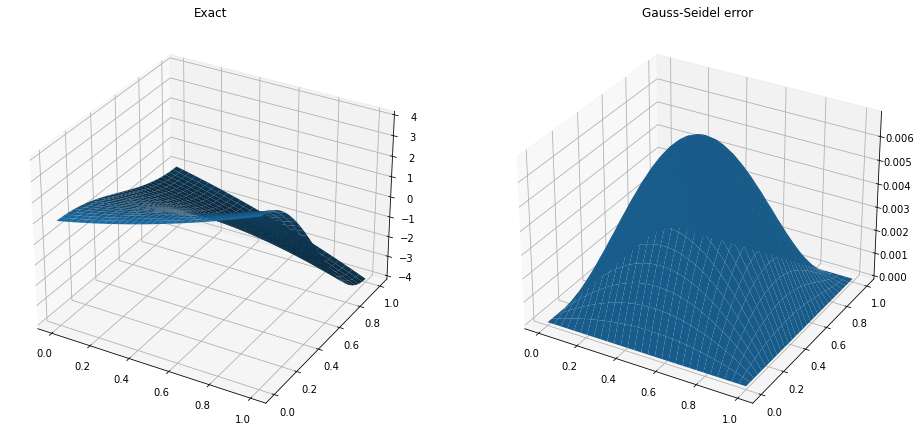

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

# This is the RHS of the equation
f = lambda x,y: (2-np.pi**2*(1+x)**2)*np.cos(np.pi*y)

# set up the grid
n=30;
x = np.linspace(0,1,n)
y = np.linspace(0,1,n);

# Useful to store f(x,y) in an array and use F(i,j) instead of f(x(i),y(k))
X,Y = np.meshgrid(x,y)
F=f(X,Y);

# determine grid size
h =x[1]-x[0]

# to hold the solutions
U = np.zeros((n,n));

# enforce boundary conditions
U[0,:] = (1+x)**2
U[-1,:]=-(1+x)**2
U[:,0] = np.cos(np.pi*y)
U[:,-1]=4*np.cos(np.pi*y)

#relaxation parameter is r=1 for Gauss-Seidel.
# You could try some higher values for relaxation.
r=1;

n,m = np.shape(U)

nsweep=300 #number of sweeps

for k in range(nsweep-1):
    for i in range(1,n-1):
        for j in range(1,m-1):
            Unew = (U[i-1,j]+U[i+1,j]+U[i,j-1]+U[i,j+1])/4-h**2/4*F[i,j]
            U[i,j] = U[i,j]+r*(Unew-U[i,j])

# compare to analytic results
T = (1+X)**2*np.cos(np.pi*Y)

fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(121,projection='3d')
ax1.plot_surface(X,Y,T)
ax1.set_title('Exact')
ax2 = fig.add_subplot(122,projection='3d')
ax2.plot_surface(X,Y,np.abs(U-T))
ax2.set_title('Gauss-Seidel error')
plt.show()

```{exercise}
Solve the problem using an iterative solution technique, for the case where:

\begin{equation*}
f(x,y)=-5 \sin(3\pi x)\cos(2\pi y),
\end{equation*}
subject to the conditions
\begin{equation*}
u_x(0,y)=0, \quad u_x(1,y)=0, \quad u_y(x,0)=0, \quad u_y(x,1)=0.
\end{equation*}

*Hint: to enforce the Neumann boundary conditions, you will need to construct the solution at nodes outside the boundary and remove these ``fictitious'' nodes from your solution at the end.*
```

Neumann conditions:

\begin{equation*}
u_x(x,y) = \frac{u(x+h,y)-u(x-h,y)}{2h}, \quad u_y(x,y) = \frac{u(x,y+k)-u(x,y-k)}{2h}
\end{equation*}

**Part 2:**
```{code}
% This is the RHS of the equation
f=@(x,y)(-5*sin(3*pi*x).*cos(2*pi*y));

% set up the grid
n=30;
x = linspace(0,1,n); y = linspace(0,1,n);

[X,Y]=meshgrid(x,y);
F=f(X,Y);

% determine grid size
h =x(2)-x(1);

% the solution grid is padded with fictitious nodes to remove at the end
U = zeros(n+2,n+2);

% we need to pad F as well, so that the two grids are not mismatched
F=padarray(F,[1,1]);

r=1;%relaxation parameter is 1 for Gauss-Seidel

[n,m] = size(U);
for k = 1:500 %for each sweep
    %enforce boundary conditions on fictitious nodes
    U(1,:)=U(3,:); U(n,:)=U(n-2,:);   
    U(:,1)=U(:,3); U(:,m)=U(:,m-2);
    for i = 2:n-1
        for j = 2:m-1
            Unew = (U(i-1,j)+U(i+1,j)+U(i,j-1)+U(i,j+1))/4-h^2/4*F(i,j);
            U(i,j) = U(i,j)+r*(Unew-U(i,j));
        end
    end
end

figure
surf(x,y,U(2:end-1,2:end-1));
```


Note: If $\phi_{sol}$ is a solution of this problem, which satisfies the boundary conditions, then $\phi_{sol}+C$ is also a solution. Hence, it is possible for the surface to appear shifted up or down in your answers.